# Potato Disease Classification

### Import all the Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
train_dir = "/content/gdrive/MyDrive/ColabNotebooks/Pictures/potato_dataset/train"
valid_dir = "/content/gdrive/MyDrive/ColabNotebooks/Pictures/potato_dataset/val"
test_dir = "/content/gdrive/MyDrive/ColabNotebooks/Pictures/potato_dataset/test"

In [4]:
IMAGE_SIZE = 256
CHANNELS = 3

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(256, 256, 3)),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
  tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
  tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
  tf.keras.layers.experimental.preprocessing.RandomWidth(0.2),
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
], name ="data_augmentation")

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
)

Found 1506 images belonging to 3 classes.


In [ ]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [13]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.58829194 0.5098606  0.5177037 ]
  [0.5911002  0.51266885 0.520512  ]
  [0.5939084  0.51547706 0.5233202 ]
  ...
  [0.7404193  0.66198796 0.6659095 ]
  [0.7202189  0.6417875  0.6457091 ]
  [0.689011   0.6105796  0.6145012 ]]

 [[0.6413863  0.56295484 0.570798  ]
  [0.6325603  0.55412894 0.5619721 ]
  [0.6237344  0.54530305 0.5531462 ]
  ...
  [0.73881465 0.6603833  0.66430485]
  [0.7170095  0.63857806 0.6424996 ]
  [0.6858015  0.60737014 0.6112917 ]]

 [[0.62814033 0.54970896 0.5575521 ]
  [0.6337569  0.55532545 0.5631686 ]
  [0.63937336 0.56094193 0.5687851 ]
  ...
  [0.7372099  0.6587785  0.66270006]
  [0.7138     0.63536865 0.6392902 ]
  [0.6825921  0.6041607  0.6080823 ]]

 ...

 [[0.51203376 0.38654354 0.39830825]
  [0.53335196 0.4078618  0.4196265 ]
  [0.5158102  0.39031994 0.40208465]
  ...
  [0.55887985 0.42554653 0.4177034 ]
  [0.556874   0.42354062 0.4156975 ]
  [0.55486804 0.42153472 0.41369158]]

 [[0.5156444  0.39015415 0.40191886]
  [0.53415436 0.40866414 0.42042884]


In [ ]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        valid_dir,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [6]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 431 images belonging to 3 classes.


In [ ]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.3791571  0.3673924  0.44974533]
  [0.50491    0.49314532 0.5754982 ]
  [0.54118496 0.52942026 0.6117732 ]
  ...
  [0.4040605  0.3922958  0.4668056 ]
  [0.42009422 0.40832952 0.48283935]
  [0.43612796 0.42436326 0.49887305]]

 [[0.37274358 0.36097887 0.4433318 ]
  [0.47284254 0.46107784 0.5434308 ]
  [0.5565773  0.5448126  0.6271656 ]
  ...
  [0.46591634 0.4541516  0.52866143]
  [0.45693746 0.44517276 0.5196825 ]
  [0.4479586  0.43619388 0.5107037 ]]

 [[0.3663301  0.35456538 0.43691835]
  [0.44077513 0.42901042 0.5113633 ]
  [0.5719697  0.560205   0.6425579 ]
  ...
  [0.42184716 0.41008246 0.48459226]
  [0.42056447 0.40879977 0.48330957]
  [0.41928178 0.40751708 0.48202688]]

 ...

 [[0.5545717  0.5624148  0.64476776]
  [0.5481582  0.55600137 0.6383543 ]
  [0.5417447  0.54958785 0.6319408 ]
  ...
  [0.81624335 0.8240865  0.88291   ]
  [0.82566315 0.8335063  0.8923299 ]
  [0.8453     0.85314316 0.91196674]]

 [[0.52984345 0.5376866  0.6200396 ]
  [0.52856076 0.5364039  0.61875683]


In [ ]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3
model=models.Sequential([layers.Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.5),
        layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.5),
        layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(32, activation ='relu'),
        layers.Dense(n_classes, activation='softmax')])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 127, 127, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 63, 63, 64)       

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=7,
    verbose=1,
    epochs=25,
)

Epoch 1/25
47/47 [==============================] - 166s 4s/step - loss: 0.8623 - accuracy: 0.5882 - val_loss: 0.8856 - val_accuracy: 0.7209
Epoch 2/25
47/47 [==============================] - 167s 4s/step - loss: 0.6252 - accuracy: 0.7714 - val_loss: 0.6796 - val_accuracy: 0.7860
Epoch 3/25
47/47 [==============================] - 165s 3s/step - loss: 0.4112 - accuracy: 0.8338 - val_loss: 0.4614 - val_accuracy: 0.8093
Epoch 4/25
47/47 [==============================] - 167s 4s/step - loss: 0.2727 - accuracy: 0.8867 - val_loss: 0.4892 - val_accuracy: 0.7535
Epoch 5/25
47/47 [==============================] - 165s 3s/step - loss: 0.2763 - accuracy: 0.8867 - val_loss: 0.3544 - val_accuracy: 0.8744
Epoch 6/25
47/47 [==============================] - 168s 4s/step - loss: 0.2240 - accuracy: 0.9091 - val_loss: 0.3080 - val_accuracy: 0.8884
Epoch 7/25
47/47 [==============================] - 165s 3s/step - loss: 0.2124 - accuracy: 0.9118 - val_loss: 0.2996 - val_accuracy: 0.8558
Epoch 8/25
47

In [ ]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 56s 4s/step - loss: 0.1502 - accuracy: 0.9559


In [ ]:
scores

[0.15020669996738434, 0.9559164643287659]

### Plotting the Accuracy and Loss Curves

In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 25, 'steps': 47}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
len(history.history['loss'])

25

In [ ]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.8623213171958923,
 0.6251806616783142,
 0.4112037122249603,
 0.2726771831512451,
 0.2762780487537384]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
val_acc

[0.7209302186965942,
 0.7860465049743652,
 0.8093023300170898,
 0.7534883618354797,
 0.8744186162948608,
 0.8883720636367798,
 0.8558139801025391,
 0.8279069662094116,
 0.9069767594337463,
 0.8418604731559753,
 0.6976743936538696,
 0.8325581550598145,
 0.8558139801025391,
 0.8558139801025391,
 0.9441860318183899,
 0.934883713722229,
 0.8930232524871826,
 0.9209302067756653,
 0.934883713722229,
 0.8186046481132507,
 0.8604651093482971,
 0.7488372325897217,
 0.9209302067756653,
 0.8930232524871826,
 0.9395349025726318]

In [ ]:
acc

[0.5881953835487366,
 0.7713704109191895,
 0.8337855935096741,
 0.886702835559845,
 0.886702835559845,
 0.9090909361839294,
 0.9118046164512634,
 0.9375848174095154,
 0.9192672967910767,
 0.9138398766517639,
 0.9185888767242432,
 0.8989145159721375,
 0.9470827579498291,
 0.9328358173370361,
 0.9470827579498291,
 0.9470827579498291,
 0.9592944383621216,
 0.9599728584289551,
 0.9735413789749146,
 0.9654002785682678,
 0.9701492786407471,
 0.9633650183677673,
 0.9681139588356018,
 0.9708276987075806,
 0.9762550592422485]

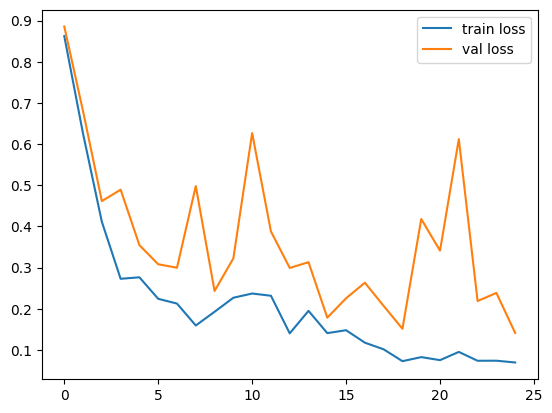

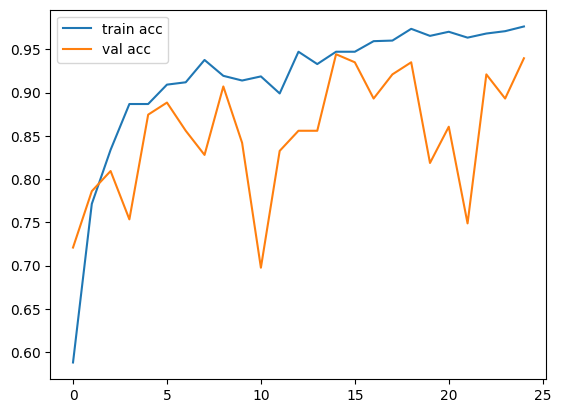

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss_CNN')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc_CNN')

In [7]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [8]:
model=load_model('/content/potatoes_cnn_model.h5')

### Write a function for inference

In [9]:
import numpy as np

In [10]:
import tensorflow as tf
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [11]:
def returnIndex(labels):
  for i in range(len(labels)):
      if(labels[i]==1):
        return i

In [14]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

Output hidden; open in https://colab.research.google.com to view.

### Saving the Model



In [ ]:
model.save('potatoes_cnn_model.h5')